In [1]:
#Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the files
df1=pd.read_csv('202012-divvy-tripdata.csv')   
df2=pd.read_csv('202101-divvy-tripdata.csv')   
df3=pd.read_csv('202102-divvy-tripdata.csv')   
df4=pd.read_csv('202103-divvy-tripdata.csv')    
df5=pd.read_csv('202104-divvy-tripdata.csv')    
df6=pd.read_csv('202105-divvy-tripdata.csv')    
df7=pd.read_csv('202106-divvy-tripdata.csv')   
df8=pd.read_csv('202107-divvy-tripdata.csv')   
df9=pd.read_csv('202108-divvy-tripdata.csv')   
df10=pd.read_csv('202109-divvy-tripdata.csv')  
df11=pd.read_csv('202110-divvy-tripdata.csv')  
df12=pd.read_csv('202111-divvy-tripdata.csv')  

In [3]:
# Incrementing all dataframes into a single dataframe.
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
df.sort_values(by='started_at',inplace=True)

In [4]:
# Rows and columns
df.shape

(5479096, 13)

In [5]:
df=df.copy()

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8504,1C46BF5EB60CC524,electric_bike,2020-12-01 00:01:15,2020-12-01 00:06:53,NaN,NaN,NaN,NaN,41.790000,-87.590000,41.800000,-87.600000,member
32523,1405BFC02FDB5190,electric_bike,2020-12-01 00:01:27,2020-12-01 00:06:33,NaN,NaN,Wentworth Ave & 63rd St,KA1503000025,41.780000,-87.620000,41.780095,-87.629709,casual
35067,892ECFAB44203EAD,docked_bike,2020-12-01 00:07:08,2020-12-01 00:10:02,Larrabee St & Armitage Ave,TA1309000006,Sedgwick St & Webster Ave,13191,41.918084,-87.643749,41.922167,-87.638888,member
96126,7F0119D219127E62,docked_bike,2020-12-01 00:11:37,2020-12-01 00:21:31,Wabash Ave & Adams St,KA1503000015,Peoria St & Jackson Blvd,13158,41.879472,-87.625688,41.877642,-87.649618,member
58876,F5C7D6CF285DD638,docked_bike,2020-12-01 00:21:28,2020-12-01 00:28:04,Clarendon Ave & Leland Ave,TA1307000119,Broadway & Argyle St,13108,41.967968,-87.650001,41.973815,-87.659660,member


In [7]:
# Information on dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479096 entries, 8504 to 41031
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.2+ MB


In [8]:
# Converting started_at and ended_at to datetime.
df[['started_at','ended_at']]=df[['started_at','ended_at']].astype('datetime64[ns]')

In [9]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    651445
start_station_id      651442
end_station_name      698909
end_station_id        698909
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [10]:
new_df=df.dropna(axis=0,how='any')
new_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
35067,892ECFAB44203EAD,docked_bike,2020-12-01 00:07:08,2020-12-01 00:10:02,Larrabee St & Armitage Ave,TA1309000006,Sedgwick St & Webster Ave,13191,41.918084,-87.643749,41.922167,-87.638888,member
96126,7F0119D219127E62,docked_bike,2020-12-01 00:11:37,2020-12-01 00:21:31,Wabash Ave & Adams St,KA1503000015,Peoria St & Jackson Blvd,13158,41.879472,-87.625688,41.877642,-87.649618,member
58876,F5C7D6CF285DD638,docked_bike,2020-12-01 00:21:28,2020-12-01 00:28:04,Clarendon Ave & Leland Ave,TA1307000119,Broadway & Argyle St,13108,41.967968,-87.650001,41.973815,-87.659660,member
121531,0D424379FB10DC7A,electric_bike,2020-12-01 00:21:32,2020-12-01 00:26:27,Clark St & Newport St,632,Lincoln Ave & Belmont Ave,TA1309000042,41.944480,-87.654786,41.939263,-87.668272,casual
111241,DC7DC1F9434292F5,docked_bike,2020-12-01 00:27:36,2020-12-01 00:30:07,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Clark St & Montrose Ave,KA1503000022,41.961406,-87.676169,41.961588,-87.666036,member


In [11]:
print('Old dataframe length ',len(df))
print("New dataframe length ",len(new_df))
print("Number of rows with at least 1 missing value ",(len(df)-len(new_df)))

Old dataframe length  5479096
New dataframe length  4525842
Number of rows with at least 1 missing value  953254


In [12]:
new_df.isnull().sum()      # all the missing values have been removed

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [13]:
# Various types of Bikes available in the Dataframe
new_df['rideable_type'].value_counts()

classic_bike     3212119
electric_bike     993581
docked_bike       320142
Name: rideable_type, dtype: int64

(0.0, 3500000.0)

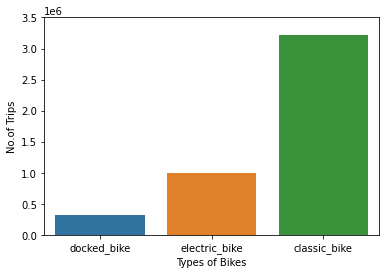

In [14]:
# visualization of the above data
sns.countplot(x=new_df['rideable_type'])
plt.xlabel('Types of Bikes')
plt.ylabel('No.of Trips')
plt.ylim([0,3500000])

There are three types of bikes and classic bikes are used by the majority of the customers whereas electric and docked bikes have significantly less utilization.

In [33]:
import datetime
from datetime import datetime

In [34]:
from_time=new_df['started_at'].dt.time

In [35]:
end_time=new_df['ended_at'].dt.time

In [36]:
new_df.loc[:,'ride_length']=pd.to_datetime(new_df['ended_at'])-pd.to_datetime(new_df['started_at'])

C:\Users\Admin\new anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Admin\new anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
print(new_df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length'],
      dtype='object')


In [94]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525842 entries, 35067 to 41031
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  park                int32          
 15  start_date1         datetime64[ns] 
 16  week_day            object         
 17  year                int64          
 18  month               int64          
dtypes: datetime64[ns](3

In [24]:
# The Bike stations where majority of public begins their journey
new_df['start_station_name'].value_counts().head()

Streeter Dr & Grand Ave    79421
Michigan Ave & Oak St      42574
Wells St & Concord Ln      41108
Millennium Park            39879
Clark St & Elm St          39176
Name: start_station_name, dtype: int64

In [25]:
# This are the stands where least people visit 
new_df['start_station_name'].value_counts().tail()

Menard Ave & North Ave            1
N Hampden Ct & W Diversey Ave     1
Throop/Hastings Mobile Station    1
Pulaski & Ann Lurie Pl            1
351                               1
Name: start_station_name, dtype: int64

In [26]:
# Majority of people end their journey on this various bike stations
new_df['end_station_name'].value_counts().head()

Streeter Dr & Grand Ave    80753
Michigan Ave & Oak St      43308
Wells St & Concord Ln      41579
Millennium Park            41058
Clark St & Elm St          38698
Name: end_station_name, dtype: int64

In [28]:
# least visited bike stations
new_df['end_station_name'].value_counts().tail()

Hamlin Ave & 62nd Pl              1
Augusta Blvd & Laramie Ave        1
Pulaski & Ann Lurie Pl            1
Sacramento Ave & 25th St          1
Throop/Hastings Mobile Station    1
Name: end_station_name, dtype: int64

In [29]:
# Distribution of Members and Casual riders.
g=new_df['member_casual'].value_counts()
print(g)

member    2497987
casual    2027855
Name: member_casual, dtype: int64


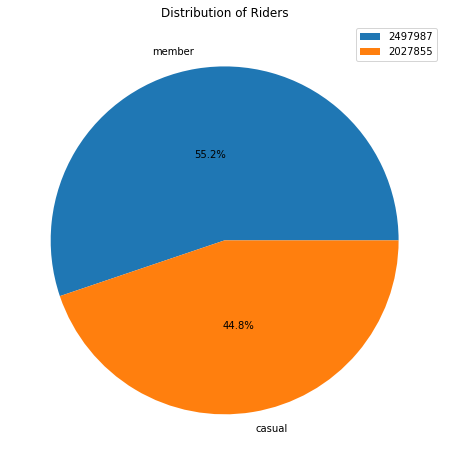

In [30]:
pie=plt.subplots(figsize=[10,8])
labels=g.keys()
plt.pie(g,labels=labels,pctdistance=0.5,autopct='%.1f%%')
plt.title('Distribution of Riders')
plt.legend(g)
plt.show()

Most of the users are members (55.2%) while 44.8% are casual riders.

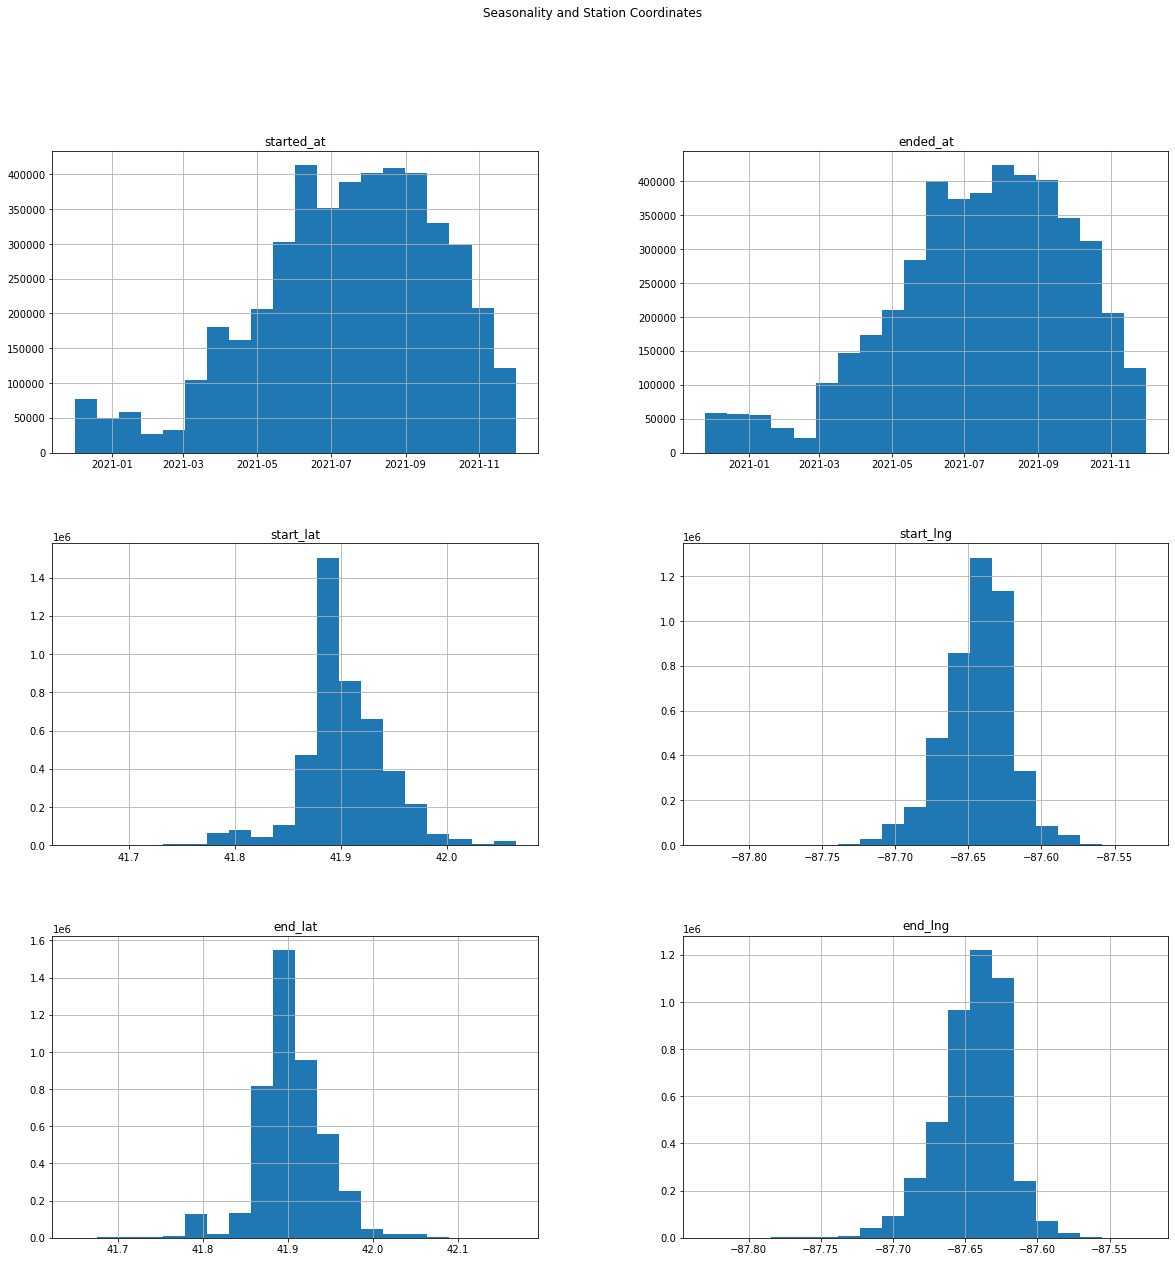

In [54]:
new_df.hist(bins=20,figsize=[20,20])
plt.suptitle('Seasonality and Station Coordinates')
plt.show()

The maximum number of bikes are used after May2021. Longitude and Latitude coordinates are close to each other with most frequent values 
occuring in the middle of the city.

In [63]:
# Location features.
new_df['park']=new_df['start_station_name'].str.lower().str.contains('park')
new_df['park']=new_df['park'].fillna(0).astype(int)

<ipython-input-63-26508e38ab78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['park']=new_df['start_station_name'].str.lower().str.contains('park')
<ipython-input-63-26508e38ab78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['park']=new_df['park'].fillna(0).astype(int)


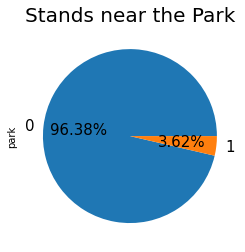

In [67]:
new_df['park'].value_counts().plot.pie(autopct='%.2f%%',fontsize=15)
plt.title('Stands near the Park',fontsize=20)
plt.show()

Based on the above analysis only 3.62 % of bike stations are located near park areas.

In [70]:
# splitting and extracting the date from the "started_at" column
new_df['start_date1']=new_df['started_at'].dt.date
new_df['start_date1']

<ipython-input-70-47e00d128ded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['start_date1']=new_df['started_at'].dt.date


35067     2020-12-01
96126     2020-12-01
58876     2020-12-01
121531    2020-12-01
111241    2020-12-01
             ...    
259368    2021-11-30
55012     2021-11-30
227838    2021-11-30
113633    2021-11-30
41031     2021-11-30
Name: start_date1, Length: 4525842, dtype: object

In [72]:
# Converting start_date1 into datetime datatype
new_df['start_date1']=new_df['start_date1'].astype('datetime64[ns]')

<ipython-input-72-a2c2dcc2e773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['start_date1']=new_df['start_date1'].astype('datetime64[ns]')


In [74]:
# Finding the weekday of the date.
new_df['week_day']=new_df['start_date1'].apply(lambda x:x.weekday())
new_df['week_day'].unique()

<ipython-input-74-cec755763728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['week_day']=new_df['start_date1'].apply(lambda x:x.weekday())


array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [80]:
# Converting weekday values into weekday
dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
new_df["week_day"] = new_df["week_day"].apply(lambda y: dict1[y])
new_df["week_day"]

<ipython-input-80-0293b05da8ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["week_day"] = new_df["week_day"].apply(lambda y: dict1[y])


35067     Monday
96126     Monday
58876     Monday
121531    Monday
111241    Monday
           ...  
259368    Monday
55012     Monday
227838    Monday
113633    Monday
41031     Monday
Name: week_day, Length: 4525842, dtype: object

In [82]:
copydf=new_df.copy()

Friday       818222
Saturday     713056
Thursday     639793
Tuesday      603183
Monday       600966
Wednesday    582070
Sunday       568552
Name: week_day, dtype: int64


Text(0.5, 1.0, 'No.of rides vs Days')

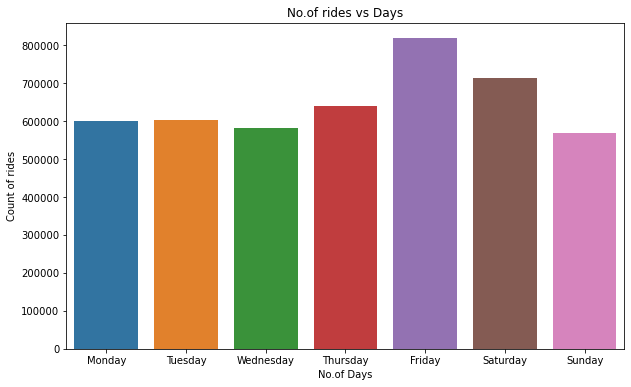

In [88]:
print(new_df['week_day'].value_counts())
plt.figure(figsize=[10,6])
sns.countplot(x=new_df['week_day'])
plt.xlabel('No.of Days')
plt.ylabel('Count of rides')
plt.title('No.of rides vs Days')

Friday and Saturday are the days where most people make use of this bicylces; however the least usage of bikes is on Wednesday and Sunday.

In [89]:
# Extracting year and month from start date column
new_df['year']=new_df['start_date1'].dt.year
new_df['month']=new_df['start_date1'].dt.month

<ipython-input-89-efd5bc26b219>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year']=new_df['start_date1'].dt.year
<ipython-input-89-efd5bc26b219>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month']=new_df['start_date1'].dt.month


In [96]:
# Checking if there are any duplicate values in the dataframe
new_df.duplicated().any()

False

In [97]:
# To calculate the mean of ride length of all types of users.
mean_ride_length=new_df['ride_length'].mean()
mean_ride_length

Timedelta('0 days 00:19:57.555200557')

In [98]:
# To calculate the max ride_length from the users
max_ride_length =new_df['ride_length'].max()
max_ride_length

Timedelta('38 days 20:24:09')

In [117]:
# to calculate the mean ride for a member
mean_ride_length_member=new_df[new_df['member_casual']=='member']
mean_ride_length_member=mean_ride_length_member['ride_length'].mean()
mean_ride_length_member

Timedelta('0 days 00:10:19.341028195')

In [119]:
# to calculate the mean ride for a casual rider
mean_ride_length_casual=new_df[new_df['member_casual']=='casual']
mean_ride_length_casual=mean_ride_length_casual['ride_length'].mean()
mean_ride_length_casual

Timedelta('0 days 00:31:49.820863424')

In [120]:
# to calculate the max ride for a member.
max_ride_length_member=new_df[new_df['member_casual']=='member']
max_ride_length_member=max_ride_length_member['ride_length'].max()
max_ride_length_member

Timedelta('1 days 00:59:50')

In [122]:
# to calculate the max ride for a casual rider.
max_ride_length_casual=new_df[new_df['member_casual']=='casual']
max_ride_length_casual=max_ride_length_casual['ride_length'].max()
max_ride_length_casual

Timedelta('38 days 20:24:09')

In [124]:
# to calculate the mode of week day for a member
mode_week_day_member=new_df[new_df['member_casual']=='member']
mode_week_day_member=mode_week_day_member['week_day'].mode()
mode_week_day_member

0    Tuesday
dtype: object

In [125]:
# to calculate the mode of week day for casual
mode_week_day_casual=new_df[new_df['member_casual']=='casual']
mode_week_day_casual=mode_week_day_casual['week_day'].mode()
mode_week_day_casual

0    Friday
dtype: object

In [127]:
# Checking the number of user over months
users_over_month=new_df.groupby('month')['member_casual'].value_counts()
users_over_month

month  member_casual
1      member            68819
       casual            14690
2      member            34383
       casual             8613
3      member           130049
       casual            75642
4      member           177787
       casual           120420
5      member           234165
       casual           216829
6      member           304586
       casual           304192
7      casual           369415
       member           322906
8      casual           341476
       member           332933
9      member           328219
       casual           292931
10     member           288855
       casual           189117
11     member           185926
       casual            69978
12     member            89359
       casual            24552
Name: member_casual, dtype: int64

Text(0.5, 1.0, 'Distribution of users per month')

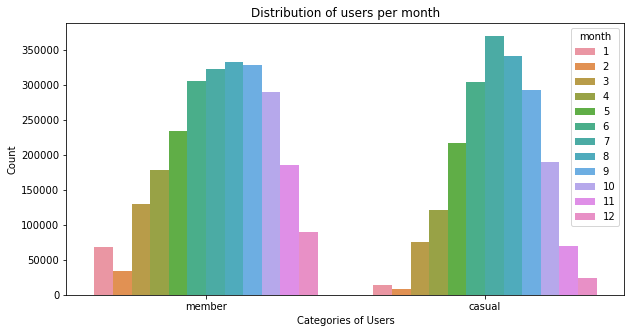

In [150]:
#Plotting the count of Member and Casual riders over months.
plt.figure(figsize=[10,5])
sns.countplot(x=new_df['member_casual'],hue=new_df['month'])
plt.xlabel('Categories of Users')
plt.ylabel('Count')
plt.title('Distribution of users per month')

For Members July is the month where maximum no.of bikes were ridden and in the other category June is the month.

In [151]:
# Check the number of users for a particular rideable type
ride_type=new_df.groupby('member_casual')['rideable_type'].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike     1253132
               electric_bike     462589
               docked_bike       312134
member         classic_bike     1958987
               electric_bike     530992
               docked_bike         8008
Name: rideable_type, dtype: int64

Text(0.5, 1.0, 'Count of Member and Casual Riders based on the various bikes')

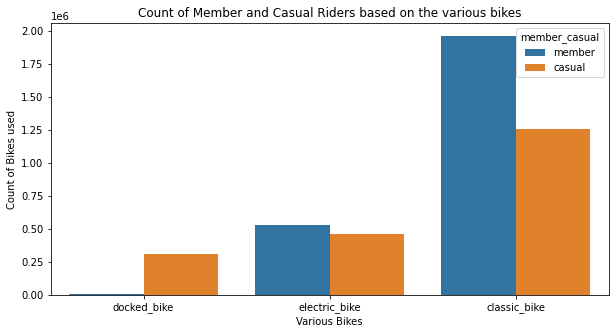

In [154]:
# Plot the distribution of bikes which are used by casual or members.
plt.figure(figsize=[10,5])
sns.countplot(x=new_df['rideable_type'],hue=new_df['member_casual'])
plt.xlabel('Various Bikes')
plt.ylabel('Count of Bikes used')
plt.title('Count of Member and Casual Riders based on the various bikes')

Members used classic and electric bikes in a major proportion whereas casual riders use all the three varieties of bikes.

# Conclusions

1-For Members July is the month where maximum no.of bikes are used and they utilize classic bikes more if compared to 
the electric bikes whereas Casual riders use all the bikes which are available.

2- Casual Riders spend a lot of time on these bikes; however members make more number of trips.

3- Rewards must be given to riders who choose to select annual plan and wants to become as a member because this will create awareness among the individuals.

4- The count of Members are high during May to Septemeber so company must focus on this people and the number of casual riders are at peak during May to August so that particular time organization must roll out new strategies into the market to increase their count.

5- More number of stations should be opened near parks because people visit park to burn calories or spend some time with the nature so cycling would be the best way to navigate around the park with friends and cutdown some calories.

6- Marathons and cycling events must be kept to advertise the product into the market so new customers could be gained in that process.